In [31]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

In [32]:
df_train = pd.read_csv("Titanic_train.csv")

In [33]:
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [34]:
# 查看有缺失值的行列
print(df_train.isnull().sum())
complete_data=df_train[['Age','Survived_cate']].dropna()
complete_data

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Survived_cate      0
dtype: int64


,Age,Survived_cate
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [35]:
# Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
# 沒有相關
aov=pg.anova(dv="Age",between="Survived_cate",data=complete_data,detailed=True)
print(aov)
etaSq=aov.SS[0]/(aov.SS[0]+aov.SS[1])
print(etaSq)

          Source             SS   DF          MS         F     p-unc       np2
0  Survived_cate     897.187582    1  897.187582  4.271195  0.039125  0.005963
1         Within  149559.448362  712  210.055405       NaN       NaN       NaN
0.0059630974469252


In [26]:
# Q2：透過數值法計算 Sex 和 Survived 是否有相關性？
# 高度相關
contTable=pd.crosstab(df_train["Sex"],df_train["Survived_cate"])
print(contTable)

freedom = min(contTable.shape[0], contTable.shape[1]) - 1
print("df:",freedom)

crosstab,res=researchpy.crosstab(df_train["Sex"],df_train["Survived_cate"],test="chi-square")
print(res)
print("Cramer's value is",res.loc[2,"results"] )

Survived_cate    0    1
Sex                    
female          81  233
male           468  109
df: 1
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434
Cramer's value is 0.5434


0.09606669176903891


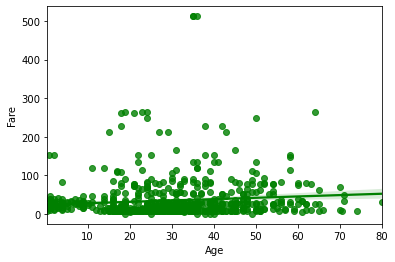

In [29]:
# Q3：透過數值法計算 Age 和 Fare 是否有相關性？
# 沒有相關性
complete_data=df_train[["Age","Fare"]].dropna()
corr,_=stats.pearsonr(complete_data["Age"],complete_data["Fare"])
print(corr)
g = sns.regplot(x="Age", y="Fare", color="g",data=complete_data)
